In [1]:
import pandas as pd
import numpy as np

import matplotlib as pyplot
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

# Review the data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

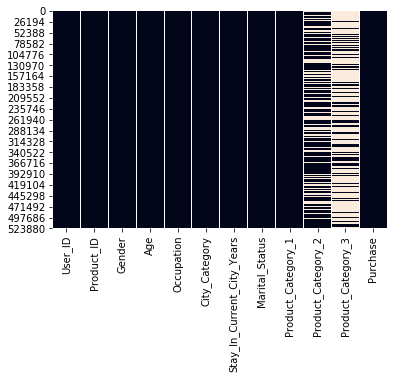

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
# Clear null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

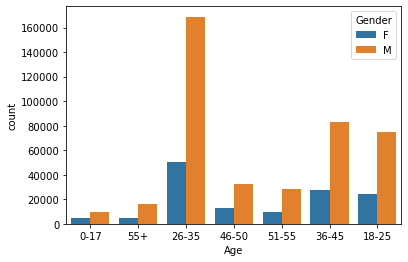

In [9]:
sns.countplot(df['Age'], hue=df['Gender'])

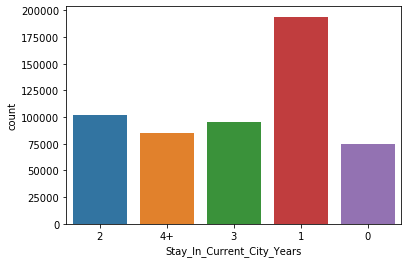

In [10]:
sns.countplot(df['Stay_In_Current_City_Years'])

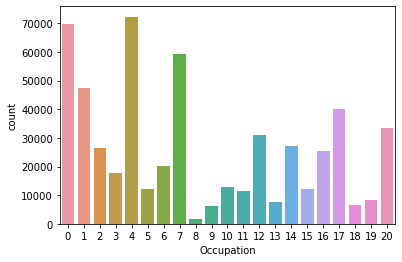

In [11]:
sns.countplot(df['Occupation'])

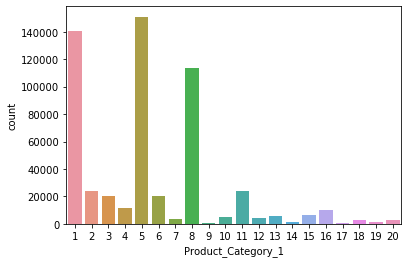

In [12]:
sns.countplot(df['Product_Category_1'])

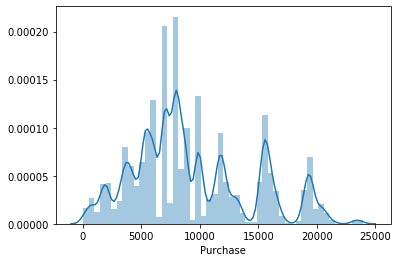

In [13]:
sns.distplot(df['Purchase'])

We have labeled data - can use supervised learning
We want to predict how much $$$ people spend - regression task

When we think about sales - consider demographic (age/gender/income/home), store (location/size/ads/product stock)

In [14]:
print(df['Product_ID'].unique())
print(len(df['Product_ID'].unique()))

['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
3631


# Prepare data

In [15]:
X = df.drop(['Purchase', 'Product_Category_2', 'Product_Category_3'], axis=1)

In [16]:
for cat in ['Age', 'City_Category', 'Stay_In_Current_City_Years']:
    tmp = pd.get_dummies(X[cat], prefix=cat, drop_first=True)
    X.drop(cat, axis=1, inplace=True)
    X = pd.concat([X, tmp], axis=1)

In [17]:
X['Gender'] = pd.get_dummies(X['Gender'], drop_first=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

for c in ['Product_ID']:
    enc = LabelEncoder()
    X[c] = enc.fit_transform(X[c])

In [19]:
X["Occupation"] = X["Occupation"].astype('category')

In [20]:
X.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,0,10,0,3,0,0,0,0,0,0,0,0,0,1,0,0
1,1000001,2376,0,10,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1000001,852,0,10,0,12,0,0,0,0,0,0,0,0,0,1,0,0
3,1000001,828,0,10,0,12,0,0,0,0,0,0,0,0,0,1,0,0
4,1000002,2734,1,16,0,8,0,0,0,0,0,1,0,1,0,0,0,1


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 18 columns):
User_ID                          550068 non-null int64
Product_ID                       550068 non-null int32
Gender                           550068 non-null uint8
Occupation                       550068 non-null category
Marital_Status                   550068 non-null int64
Product_Category_1               550068 non-null int64
Age_18-25                        550068 non-null uint8
Age_26-35                        550068 non-null uint8
Age_36-45                        550068 non-null uint8
Age_46-50                        550068 non-null uint8
Age_51-55                        550068 non-null uint8
Age_55+                          550068 non-null uint8
City_Category_B                  550068 non-null uint8
City_Category_C                  550068 non-null uint8
Stay_In_Current_City_Years_1     550068 non-null uint8
Stay_In_Current_City_Years_2     550068 non-null uint8
Stay_I

In [22]:
y = df["Purchase"]

In [23]:
X = X.drop(["User_ID"], axis=1)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

## Regression Model Comparison

In [26]:
import sklearn
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import svm

In [27]:
from sklearn import metrics

def get_metrics(reg, y_test, y_pred):
    res = []
    
    res.append(str(reg.__class__.__name__))
    mae = metrics.mean_absolute_error(y_test, y_pred)
    res.append(mae)
    mse = metrics.mean_squared_error(y_test, y_pred)
    res.append(mse)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    res.append(rmse)
    r2 = metrics.r2_score(y_test, y_pred)
    res.append(r2)
    
    return res
               
def show_metrics(res):
    print(res[0])
    print(' MAE : ', res[1])
    print(' MSE : ', res[2])
    print(' RMSE: ', res[3])
    print(' R^2 : ', res[4])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 1/3, random_state = 0)

In [29]:
# Start with plolynomial regression
pf = PolynomialFeatures(degree=2)
X_poly_train = pf.fit_transform(X_train)
X_poly_test = pf.fit_transform(X_test)

In [30]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred = lr.predict(X_poly_test)
print(y_pred)

[13430.  5046.  8612. ...  6992.  7640. 12166.]


In [32]:
results = []
m = get_metrics(lr, y_test, y_pred)
m[0] = 'PolynomialRegression'
show_metrics(m)
results.append(m)

PolynomialRegression
 MAE :  3309.7693721503524
 MSE :  19261763.36996335
 RMSE:  4388.8225493819355
 R^2 :  0.23849099326810363


In [33]:
regressors = [
    Ridge(alpha=.5),
    Lasso(alpha=0.1),
    LinearRegression(), 
    DecisionTreeRegressor(), 
    # RandomForestRegressor(),
    GradientBoostingRegressor(), 
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, 
                     max_depth = 5, alpha = 10, n_estimators = 10), 
    # svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    # KNeighborsRegressor(n_neighbors=3)
]

### Commented out regressors are processing over 100 minutes

In [34]:
for r in regressors: 
    print('======================================================================================')
    print('Running %s' % (r))
    r.fit(X_train, y_train)
    # print('Accuracy score for %s is %s' % (r, r.score(X_test, y_test) * 100))
    m = get_metrics(r, y_test, r.predict(X_test))
    show_metrics(m)
    results.append(m)
    print('======================================================================================')
    print('')

Running Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Ridge
 MAE :  3593.786762298473
 MSE :  21952039.01848128
 RMSE:  4685.300312518001
 R^2 :  0.1321316170475143

Running Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Lasso
 MAE :  3593.7848869242807
 MSE :  21952043.356074445
 RMSE:  4685.300775411803
 R^2 :  0.1321314455618513

Running LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
LinearRegression
 MAE :  3593.786431714285
 MSE :  21952039.006256834
 RMSE:  4685.300311213448
 R^2 :  0.13213161753080482

Running DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf

### Try ANN

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [40]:
model = Sequential()
model.add(Dense(17, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))

optimizer = Adam(lr=0.35)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

In [41]:
model.fit(X_train, y_train, epochs=300, batch_size=5000, verbose=1)

Epoch 1/300
366712/366712 [==============================] - 2s 6us/step - loss: 27566457.0961 - mse: 27566458.0000 - mae: 3892.9680
Epoch 2/300
366712/366712 [==============================] - 1s 2us/step - loss: 18155575.8553 - mse: 18155578.0000 - mae: 3146.8047
Epoch 3/300
366712/366712 [==============================] - 1s 2us/step - loss: 17709590.5912 - mse: 17709594.0000 - mae: 3101.3469
Epoch 4/300
366712/366712 [==============================] - 1s 3us/step - loss: 17617609.4716 - mse: 17617608.0000 - mae: 3090.4272: 0s - loss: 17589826.9583 - mse: 175898
Epoch 5/300
366712/366712 [==============================] - 1s 2us/step - loss: 17417587.5991 - mse: 17417586.0000 - mae: 3076.9624
Epoch 6/300
366712/366712 [==============================] - 1s 2us/step - loss: 16836138.8668 - mse: 16836136.0000 - mae: 3039.1636
Epoch 7/300
366712/366712 [==============================] - 1s 2us/step - loss: 15343121.9271 - mse: 15343123.0000 - mae: 2890.7642
Epoch 8/300
366712/366712 [==

366712/366712 [==============================] - 1s 2us/step - loss: 9522419.6064 - mse: 9522421.0000 - mae: 2315.7263
Epoch 63/300
366712/366712 [==============================] - 1s 2us/step - loss: 9479498.4123 - mse: 9479498.0000 - mae: 2310.6299
Epoch 64/300
366712/366712 [==============================] - 1s 2us/step - loss: 9625531.4836 - mse: 9625532.0000 - mae: 2326.4646
Epoch 65/300
366712/366712 [==============================] - 1s 2us/step - loss: 9515839.4748 - mse: 9515838.0000 - mae: 2313.9478
Epoch 66/300
366712/366712 [==============================] - 1s 2us/step - loss: 9586487.5034 - mse: 9586488.0000 - mae: 2321.4202
Epoch 67/300
366712/366712 [==============================] - 1s 2us/step - loss: 9532380.5223 - mse: 9532381.0000 - mae: 2313.5784
Epoch 68/300
366712/366712 [==============================] - 1s 2us/step - loss: 9580003.6430 - mse: 9580002.0000 - mae: 2320.7878
Epoch 69/300
366712/366712 [==============================] - 1s 2us/step - loss: 9482342

366712/366712 [==============================] - 1s 3us/step - loss: 9667505.2546 - mse: 9667505.0000 - mae: 2329.4675: 0s - loss: 9673957.1970 - mse: 9673957.0000 - mae: 2330.
Epoch 123/300
366712/366712 [==============================] - 1s 3us/step - loss: 9557374.9596 - mse: 9557375.0000 - mae: 2317.6094
Epoch 124/300
366712/366712 [==============================] - 1s 3us/step - loss: 9479398.4175 - mse: 9479398.0000 - mae: 2307.2368
Epoch 125/300
366712/366712 [==============================] - 1s 3us/step - loss: 9437408.2586 - mse: 9437408.0000 - mae: 2302.3767
Epoch 126/300
366712/366712 [==============================] - 1s 3us/step - loss: 9471900.9334 - mse: 9471899.0000 - mae: 2306.6313
Epoch 127/300
366712/366712 [==============================] - 1s 3us/step - loss: 9475421.5841 - mse: 9475423.0000 - mae: 2304.3997
Epoch 128/300
366712/366712 [==============================] - 1s 3us/step - loss: 9518460.1023 - mse: 9518457.0000 - mae: 2308.9858: 0s - loss: 9418157.1778 

366712/366712 [==============================] - 1s 3us/step - loss: 9522021.5999 - mse: 9522020.0000 - mae: 2314.4263
Epoch 182/300
366712/366712 [==============================] - 1s 3us/step - loss: 9523603.6872 - mse: 9523602.0000 - mae: 2313.0552
Epoch 183/300
366712/366712 [==============================] - 1s 2us/step - loss: 9459887.2559 - mse: 9459888.0000 - mae: 2303.7012
Epoch 184/300
366712/366712 [==============================] - 1s 2us/step - loss: 9512661.1006 - mse: 9512660.0000 - mae: 2307.7314
Epoch 185/300
366712/366712 [==============================] - 1s 2us/step - loss: 9460243.6368 - mse: 9460243.0000 - mae: 2303.8113
Epoch 186/300
366712/366712 [==============================] - 1s 2us/step - loss: 9430511.5339 - mse: 9430512.0000 - mae: 2300.0930
Epoch 187/300
366712/366712 [==============================] - 1s 2us/step - loss: 9550325.2303 - mse: 9550324.0000 - mae: 2313.6638
Epoch 188/300
366712/366712 [==============================] - 1s 2us/step - loss: 

366712/366712 [==============================] - 1s 2us/step - loss: 9502137.2233 - mse: 9502137.0000 - mae: 2308.8210
Epoch 243/300
366712/366712 [==============================] - 1s 2us/step - loss: 9426415.3396 - mse: 9426417.0000 - mae: 2300.2900
Epoch 244/300
366712/366712 [==============================] - 1s 2us/step - loss: 9602611.2764 - mse: 9602610.0000 - mae: 2317.3118
Epoch 245/300
366712/366712 [==============================] - 1s 2us/step - loss: 9573392.4223 - mse: 9573394.0000 - mae: 2315.1045
Epoch 246/300
366712/366712 [==============================] - 1s 2us/step - loss: 9513254.1822 - mse: 9513255.0000 - mae: 2309.2612
Epoch 247/300
366712/366712 [==============================] - 1s 2us/step - loss: 9504046.8928 - mse: 9504046.0000 - mae: 2308.0728
Epoch 248/300
366712/366712 [==============================] - 1s 2us/step - loss: 9510217.7771 - mse: 9510218.0000 - mae: 2307.4836
Epoch 249/300
366712/366712 [==============================] - 1s 2us/step - loss: 

KeyboardInterrupt: 

In [ ]:
m = get_metrics(model, y_test, model.predict(X_test))
m[0] = 'ANN'
show_metrics(m)
results.append(m)

In [ ]:
res = pd.DataFrame(np.array(results))
res.columns = ['Name', 'MAE', 'MSE', 'RMSE', 'R^2']

In [ ]:
sns.barplot(data=res, y='Name', x='R^2')